In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as opt

In [2]:
dados = pd.read_csv("dados.csv", delimiter = "\t")
I = np.array(dados["I(A)"], float)
V = np.array(dados["V(mV)"], float)
dados

,I(A),V(mV)
0,0.903,7.05
1,0.898,7.00
2,0.799,6.25
3,0.697,5.25
4,0.499,3.70
5,0.398,2.70
6,0.298,1.70
7,0.200,0.70
8,0.099,-0.30
9,0.000,-1.40


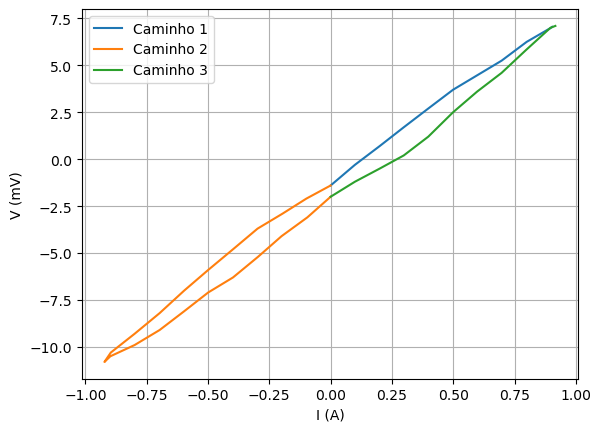

In [3]:
plt.plot(I[:10],V[:10], label = 'Caminho 1')

#adiciono um offset de 1.2 pq por algum motivo ao trocar os cabos tinhamos essa cena "resídual"
#vamos pensar sobre pq raio isso faz sentido
plt.plot(I[10:31],V[10:31] +1.2, label = 'Caminho 2') 

plt.plot(I[31:],V[31:], label = 'Caminho 3')

plt.legend()
plt.xlabel('I (A)')
plt.ylabel('V (mV)')
plt.grid()
plt.show()

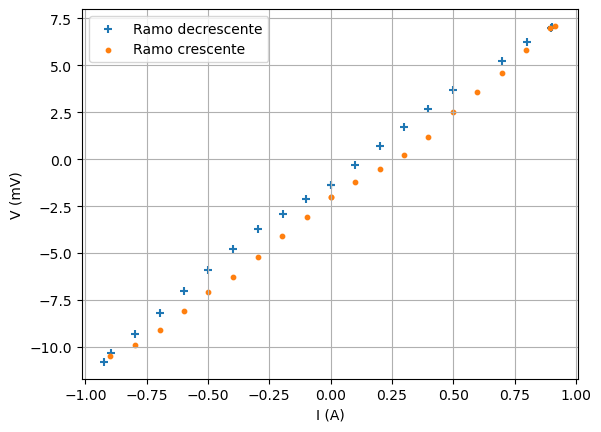

In [4]:
#Vou dividir em dois ramos

I1 = np.concatenate((I[0:10], I[10:21]))
V1 = np.concatenate((V[0:10], V[10:21] + 1.2))

I2 = np.concatenate((I[21:31], I[31:]))
V2 = np.concatenate((V[21:31] + 1.2, V[31:]))

plt.scatter(I1,V1, marker = '+', label = 'Ramo 1, decrescente')
plt.scatter(I2,V2, marker = 'o', s = 10, label = 'Ramo 2, crescente')

plt.xlabel('I (A)')
plt.ylabel('V (mV)')
plt.grid()
plt.legend()
plt.show()

In [5]:
#funções auxiliares para ajuste

def Langevin(x):
    return 1/np.tanh(x) - 1/x

def adjustFunc(x, a, c, I0):
    return a * Langevin(c * (x - I0))

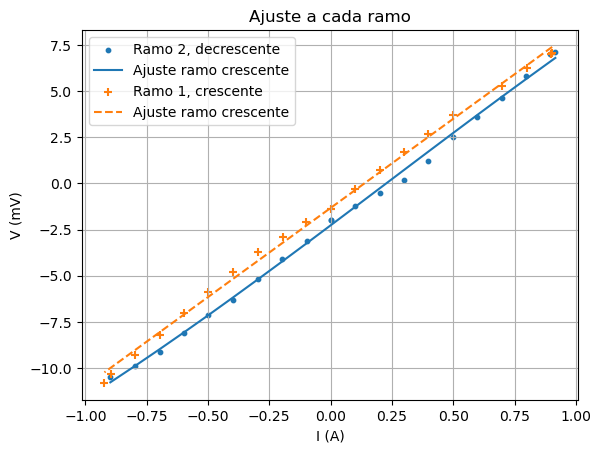

[9.95797726e+02 2.90811239e-02 1.37451033e-01] [[ 3.31842211e+09 -9.69203473e+04  6.32070547e+00]
 [-9.69203473e+04  2.83072911e+00 -1.85235928e-04]
 [ 6.32070547e+00 -1.85235928e-04  4.65894727e-05]]
[39.55565095  0.76097827  0.22649969] [[ 2.11770495e+02 -4.27931582e+00 -2.06366318e-02]
 [-4.27931582e+00  8.65431825e-02  4.02504268e-04]
 [-2.06366318e-02  4.02504268e-04  3.97995348e-05]]


In [28]:
# vamos fazer o ajuste de cada ramo separadamente

params2, vars2 = opt.curve_fit(adjustFunc, I2, V2)

plt.title('Ajuste a cada ramo')

plt.scatter(I2,V2, marker = 'o', label = 'Ramo 2, decrescente',s=10)
plt.plot(I2, adjustFunc(I2,params2[0],params2[1],params2[2]), label = 'Ajuste ramo crescente')

###################
params1, vars1 = opt.curve_fit(adjustFunc, I1, V1, p0 = params2)

plt.scatter(I1,V1, marker = '+', label = 'Ramo 1, crescente')
plt.plot(I1, adjustFunc(I1,params1[0],params1[1],params1[2]), label = 'Ajuste ramo crescente', ls='--')


plt.legend()
plt.grid()
plt.xlabel('I (A)')
plt.ylabel('V (mV)')
plt.show()

print(params1, vars1)
print(params2, vars2)

In [21]:
#incerteza cobertura ~=100%, RAMO 1
for i in range(3):
    print(np.sqrt(vars1[i,i])*3)

print('\n')
#incerteza cobertura ~=100%, RAMO 2
for i in range(3):
    print(np.sqrt(vars2[i,i])*3)

172817.24155571114
5.047431231195392
0.020476944448060832


43.65700921814616
0.882546679843553
0.018926061737396867


In [27]:
print(f'{(np.sqrt(3)*10**3)**2:e}')

3.000000e+06
